In [15]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import json
import os
from os.path import join
import sys
from time import time

import matplotlib.pyplot as plt
from skimage.io import imshow, imread
import yaml

with open('malawi_config.yaml') as config_file:
    config = yaml.safe_load(config_file)

from dataset import Datasets
from models import PretrainedModel, xception_preprocess_input
from utils import get_experiment_name

In [3]:
def preprocess_input(img):
    return xception_preprocess_input(img)

# These classes are going to be used:
classes = sorted(
    ['cassava', 'groundnut', 'maize', 'other', 'tobacco']
)

# Load the datasets for training, validation and testing
data = Datasets(
    config['patches_path'],
    preprocess_input=preprocess_input,
    validation_split=config['validation_split'], random_state=10, classes=classes,
    testing_mosaics=['m8', 'm15', 'm21', 'm22'],
)

Found 9194 images belonging to 5 classes.
Found 555 images belonging to 5 classes.
Found 1609 images belonging to 5 classes.
Class weights: {0: 3.685860058309038, 1: 3.5166898470097356, 2: 1, 3: 1.2492588932806323, 4: 3.571327683615819}


In [4]:
data.summary()

,training,training_percentage,validation,validation_percentage,testing,testing_percentage
maize,5057,55.003263,305,54.954955,493,30.640149
other,2024,22.014357,35,6.306306,418,25.978869
groundnut,719,7.820318,34,6.126126,216,13.424487
tobacco,708,7.700674,52,9.369369,370,22.995649
cassava,686,7.461388,129,23.243243,112,6.960845


In [39]:
import numpy as np
validation_polygons = []
training_polygons = []
validation_split = 0.15

for label, df in data.patches.groupby('labels'):
    polygons = df.polygon_ids.unique()
    r = np.random.RandomState(1234)
    r.shuffle(polygons)
    validation_polygons = np.concatenate([validation_polygons, polygons[:int(validation_split*len(polygons))]])
    training_polygons = np.concatenate([training_polygons, polygons[int(validation_split*len(polygons)):]])

In [45]:
data.patches[data.patches.polygon_ids.isin(training_polygons)].labels.value_counts() # training_polygons

maize        4869
other        2103
tobacco      1019
groundnut     822
cassava       656
Name: labels, dtype: int64

In [48]:
data.patches[data.patches.polygon_ids.isin(validation_polygons)].labels.value_counts() / data.patches[data.patches.polygon_ids.isin(training_polygons)].labels.value_counts() # training_polygons

cassava      0.413110
groundnut    0.178832
maize        0.202506
other        0.177841
tobacco      0.108930
Name: labels, dtype: float64

In [8]:

for inputs, targets in data.validation:
    break

W0711 14:26:13.289518 140225486808576 image.py:693] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


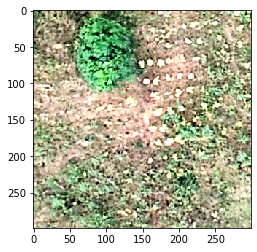

In [21]:
plt.imshow(inputs[6]+0.7)

## TODO: Make a stratified split

In [12]:
data.training_patches.labels.value_counts()

maize        4778
other        1676
cassava       778
tobacco       733
groundnut     697
Name: labels, dtype: int64

In [13]:
data.validation_patches.labels.value_counts()

maize        584
other        383
groundnut     56
cassava       37
tobacco       27
Name: labels, dtype: int64

In [14]:
data.testing_patches.labels.value_counts()

maize        493
other        418
tobacco      370
groundnut    216
cassava      112
Name: labels, dtype: int64